In [28]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
import pydotplus
from matplotlib import rcParams
import seaborn as sb

from collections import Counter

In [29]:
df1 = pd.read_csv('1_ITSM_cleansedFile.csv')

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35846 entries, 0 to 35845
Data columns (total 13 columns):
c_CI_Cat                        35846 non-null object
c_CI_Name                       35846 non-null object
c_CI_Subcat                     35846 non-null object
c_Closure_Code                  35846 non-null object
c_WBS                           35846 non-null object
q_No_of_Reassignments           35846 non-null int64
q_No_of_Related_Incidents       35846 non-null float64
q_No_of_Related_Interactions    35846 non-null float64
t_Close_Time                    35846 non-null object
t_Open_Time                     35846 non-null object
y_Priority                      35846 non-null int64
t_ReopenFlag                    35846 non-null float64
t_TicketWIPDurationDays         35846 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 3.6+ MB


In [31]:
df1.columns

Index(['c_CI_Cat', 'c_CI_Name', 'c_CI_Subcat', 'c_Closure_Code', 'c_WBS',
       'q_No_of_Reassignments', 'q_No_of_Related_Incidents',
       'q_No_of_Related_Interactions', 't_Close_Time', 't_Open_Time',
       'y_Priority', 't_ReopenFlag', 't_TicketWIPDurationDays'],
      dtype='object')

In [32]:
# Categorise varibales
CatVarList = ['c_CI_Cat', 'c_CI_Name', 'c_CI_Subcat', 'c_Closure_Code', 'c_WBS','t_ReopenFlag']
ConVarList = ['q_No_of_Reassignments', 'q_No_of_Related_Incidents','q_No_of_Related_Interactions','t_TicketWIPDurationDays']
DatVarList = ['t_Close_Time', 't_Open_Time']
OutValList = ['y_Priority']

## Checking normality of varibales - to understand  the requirment of tranforming the varibales

In [33]:
# Check distribution of continous variables - None Seem to be nomrmal in distribution
ConVarStats = df1[ConVarList].agg(['skew','kurtosis','std','mean','min','median','max'])
print(ConVarStats)

          q_No_of_Reassignments  q_No_of_Related_Incidents  \
skew                   4.691278                  50.551020   
kurtosis              38.303706                3771.437452   
std                    2.208733                   0.666176   
mean                   1.068264                   0.051024   
min                    0.000000                   0.000000   
median                 0.000000                   0.000000   
max                   46.000000                  63.000000   

          q_No_of_Related_Interactions  t_TicketWIPDurationDays  
skew                         90.888270                12.252646  
kurtosis                  10330.456008               222.604482  
std                           2.883947                19.670985  
mean                          1.158790                 5.120241  
min                           0.000000                 0.000000  
median                        1.000000                 0.737153  
max                         370.000000   

In [34]:
# The P value > 0.05 for the varible to be normal (In this test null hypothesis is reverse of usual. 
#None of the variables are normal. We can look at 
#log transforming those varibales before being fed into the algorithms

NormailityStat = pd.DataFrame()
for i in ConVarList:
    print(i,stats.shapiro(df1[[i]]))


q_No_of_Reassignments (0.524766206741333, 0.0)
q_No_of_Related_Incidents (0.04345524311065674, 0.0)
q_No_of_Related_Interactions (0.023521780967712402, 0.0)
t_TicketWIPDurationDays (0.23149150609970093, 0.0)


E:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
E:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
E:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
E:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Box plot of all the varibles - to analyse the possibility of scaling

In [35]:
df1[ConVarList].describe()

,q_No_of_Reassignments,q_No_of_Related_Incidents,q_No_of_Related_Interactions,t_TicketWIPDurationDays
count,35846.000000,35846.000000,35846.000000,35846.000000
mean,1.068264,0.051024,1.158790,5.120241
std,2.208733,0.666176,2.883947,19.670985
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.052778
50%,0.000000,0.000000,1.000000,0.737153
75%,1.000000,0.000000,1.000000,3.858333
max,46.000000,63.000000,370.000000,638.013194


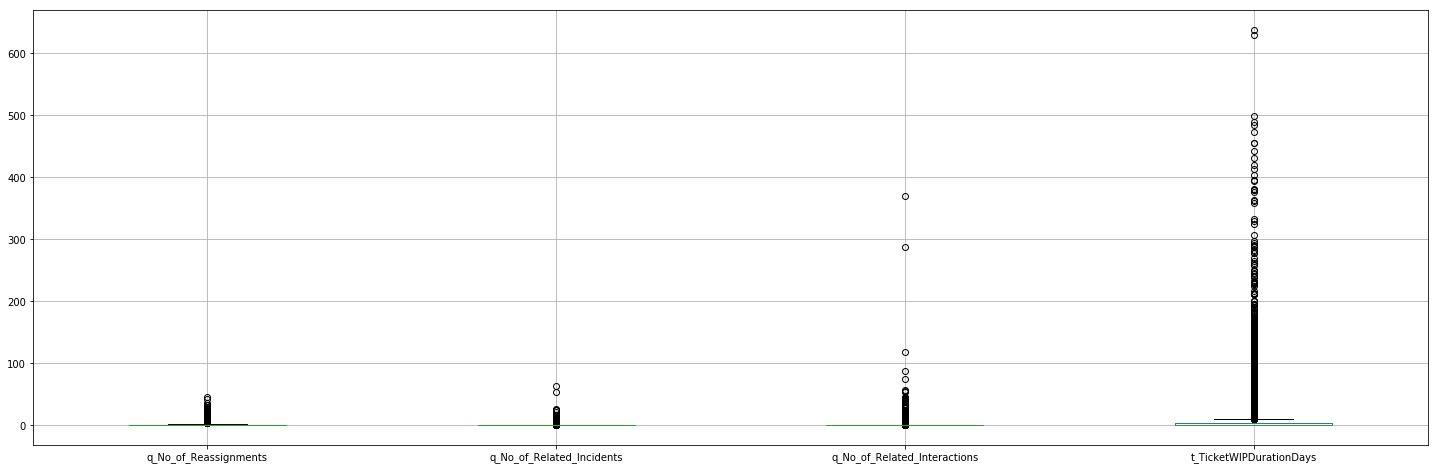

In [36]:
# the magnitude of variations between varibales is  huge. Variables have to be scaled.
rcParams['figure.figsize'] =25,8
df1[ConVarList].boxplot()


## Basic Pie chart of outcome variable

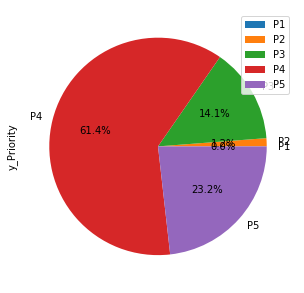

In [37]:
#P1,P2 are in extreme minority as compared to P3,P4,P5
rcParams['figure.figsize'] =10,5
df1.y_Priority.value_counts(sort=False).plot.pie(labels=["P1","P2",'P3','P4','P5'],legend = True, autopct='%1.1f%%',shadow=False)
plt.show()

## Lets look at actual Numbers 

In [38]:
Counter(df1.y_Priority)

Counter({4: 22023, 3: 5068, 5: 8321, 2: 431, 1: 3})

## Analysing Ticket Resolution Durations

In [39]:
# Analysing Accounbt length
df1['t_TicketWIPDurationDays'].describe()

count    35846.000000
mean         5.120241
std         19.670985
min          0.000000
25%          0.052778
50%          0.737153
75%          3.858333
max        638.013194
Name: t_TicketWIPDurationDays, dtype: float64

In [40]:
# Converting Ticket Resolution Duraion into Bins( 50 Days each). Check the frequency of each bin
custom_bucket_array = np.linspace(0, 700, 141)
df1['t_TicketWIPDurationDays_bins'] = pd.cut(df1['t_TicketWIPDurationDays'], custom_bucket_array)

In [41]:
# Show the chrn has happened in for account lengths in durations 5 days. Also Majority of P1/P2 have been solbed in 5 days
#seem to have been solved in with in 5 days
Crosstab_AL = pd.crosstab(df1.t_TicketWIPDurationDays_bins, df1.y_Priority)
print(Crosstab_AL)
#Crosstab_AL.plot(kind='barh', stacked=False, grid=True, title="Ticket Resolved Duration vs Priority: Calculated as % of overall data")

y_Priority                    1    2     3      4     5
t_TicketWIPDurationDays_bins                           
(0.0, 5.0]                    2  417  4474  17956  5634
(5.0, 10.0]                   1   11   288   1952  1460
(10.0, 15.0]                  0    2   107    749   539
(15.0, 20.0]                  0    0    33    311   207
(20.0, 25.0]                  0    1    33    219   161
(25.0, 30.0]                  0    0    26    128    80
(30.0, 35.0]                  0    0     6     90    45
(35.0, 40.0]                  0    0    14     58    33
(40.0, 45.0]                  0    0     8     60    34
(45.0, 50.0]                  0    0     7     42    16
(50.0, 55.0]                  0    0     2     53    17
(55.0, 60.0]                  0    0     2     23    12
(60.0, 65.0]                  0    0     3     47    10
(65.0, 70.0]                  0    0     3     21     6
(70.0, 75.0]                  0    0     3     17     8
(75.0, 80.0]                  0    0     2     2

### Getting a closer Look on P1 & P2 tickets
### Result: Since the results are so skewed we can look at Keeping 2 categories (High-P1/P2 and Low-P3/P4/P5)

In [42]:
# Select only p1 or p2 incidents
df_temp = df1[(df1.y_Priority==1) | (df1.y_Priority==2)]
df_temp.shape


(434, 14)

In [43]:
# majority of P1/P2 have been solved with in 1.25 days
custom_bucket_array = np.linspace(0, 25, 101)
df_temp['t_P1_2_TicketWIPDurationDays_bins'] = pd.cut(df_temp['t_TicketWIPDurationDays'], custom_bucket_array)
Crosstab_AL = pd.crosstab(df_temp.t_P1_2_TicketWIPDurationDays_bins, df_temp.y_Priority)
print(Crosstab_AL)

y_Priority                         1    2
t_P1_2_TicketWIPDurationDays_bins        
(0.0, 0.25]                        0  279
(0.25, 0.5]                        0   21
(0.5, 0.75]                        0    8
(0.75, 1.0]                        0   32
(1.0, 1.25]                        0   29
(1.25, 1.5]                        0    3
(1.5, 1.75]                        0    1
(1.75, 2.0]                        0    5
(2.0, 2.25]                        2    8
(2.25, 2.5]                        0    1
(2.5, 2.75]                        0    3
(2.75, 3.0]                        0    6
(3.0, 3.25]                        0    6
(3.25, 3.5]                        0    3
(3.75, 4.0]                        0    4
(4.0, 4.25]                        0    3
(4.25, 4.5]                        0    2
(4.75, 5.0]                        0    3
(5.0, 5.25]                        0    2
(5.5, 5.75]                        0    1
(5.75, 6.0]                        0    2
(6.0, 6.25]                       

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
# Delete the temporary columns created
#DeletColList = ['t_P1_2_TicketWIPDurationDays_bins','t_TicketWIPDurationDays_bins'']

# Delete the listed columns / features
#df1.drop(DeletColList, inplace=True, axis=1)

# Index the columns to keep catagorical, continous and outcome separately
#df1=df1.sort_index(axis=1)

#
df1.head()

,c_CI_Cat,c_CI_Name,c_CI_Subcat,c_Closure_Code,c_WBS,q_No_of_Reassignments,q_No_of_Related_Incidents,q_No_of_Related_Interactions,t_Close_Time,t_Open_Time,y_Priority,t_ReopenFlag,t_TicketWIPDurationDays,t_TicketWIPDurationDays_bins
0,subapplication,SUB000508,Web Based Application,Other,WBS000162,26,2.0,1.0,2013-11-04 13:51:00,2012-02-05 13:32:00,4,0.0,638.013194,"(635.0, 640.0]"
1,application,WBA000124,Web Based Application,Software,WBS000088,33,1.0,1.0,2013-12-02 12:36:00,2012-03-12 15:44:00,3,1.0,629.869444,"(625.0, 630.0]"
2,application,WBA000124,Web Based Application,Operator error,WBS000088,13,0.0,1.0,2013-11-14 09:31:00,2012-07-17 11:49:00,4,0.0,484.904167,"(480.0, 485.0]"
3,application,WBA000124,Web Based Application,Other,WBS000088,2,0.0,1.0,2013-11-08 13:55:00,2012-08-10 11:01:00,4,0.0,455.120833,"(455.0, 460.0]"
4,application,WBA000124,Web Based Application,Other,WBS000088,4,0.0,1.0,2013-11-08 13:54:00,2012-08-10 11:27:00,4,0.0,455.102083,"(455.0, 460.0]"


## Analyse CI Category and sub catgeory

y_Priority                 1       2        3        4        5
c_CI_Cat                                                       
Phone                 0.0000  0.0028   0.0028   0.0000   0.0000
application           0.0028  0.5300  10.8129  42.0131  14.6209
applicationcomponent  0.0000  0.0000   0.0084   0.0028   0.0000
computer              0.0000  0.4854   0.7839   1.6264   5.4623
database              0.0000  0.0000   0.4017   0.0446   0.0195
displaydevice         0.0000  0.0000   0.0000   0.4268   0.0279
hardware              0.0000  0.0167   0.3933   0.1116   0.4491
networkcomponents     0.0000  0.0558   0.0949   0.0753   0.0167
officeelectronics     0.0000  0.0000   0.1032   0.1813   0.1032
software              0.0000  0.0084   0.3655   0.3097   0.0586
storage               0.0000  0.0112   0.5133   0.9485   0.1506
subapplication        0.0056  0.0921   0.6584  15.6977   2.3043


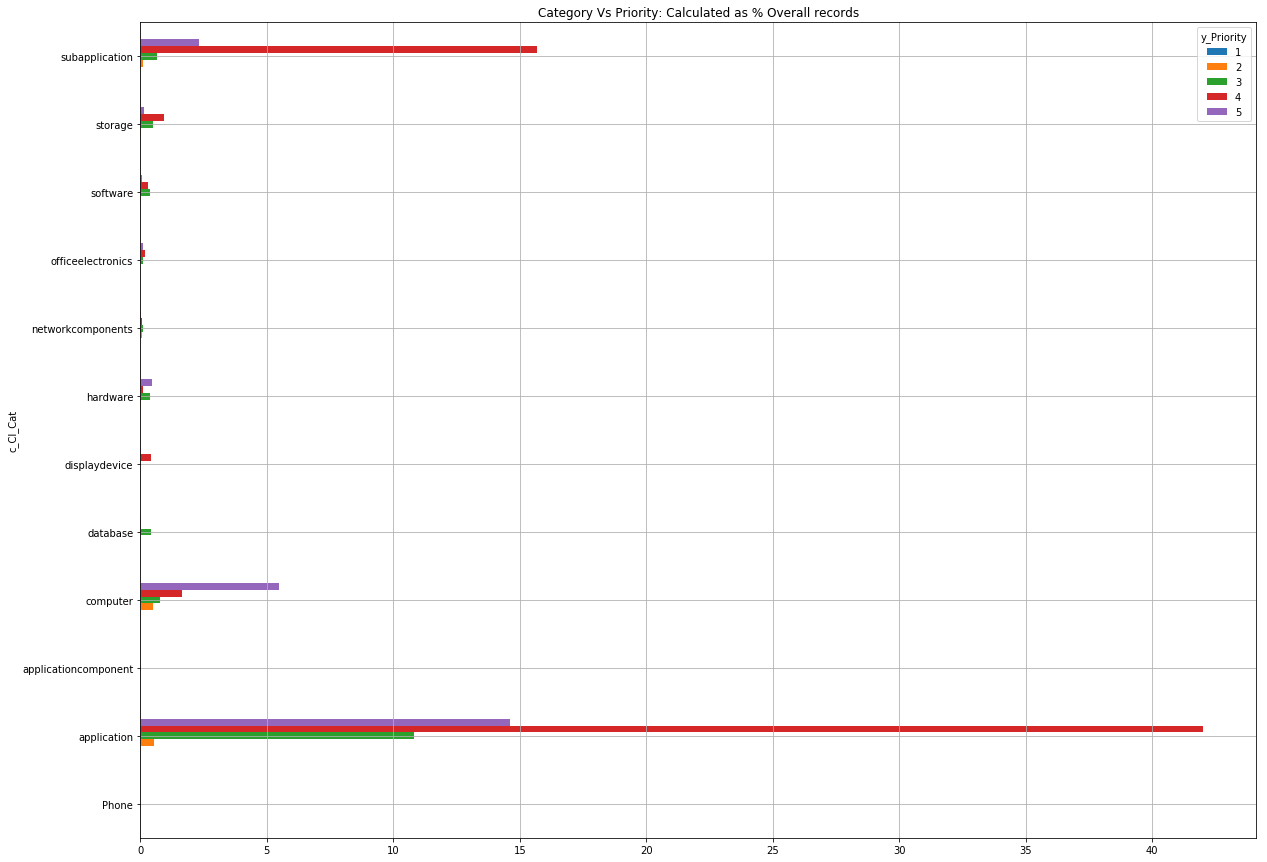

In [45]:
# 68% belong to application and 18% belong to subapplication category.
# All P1s belong to the same category - application, subapp. P2 are a spread across
# Since the Outcome classes are highly skewed, we can look at deleting records where P1 and P2 =0
rcParams['figure.figsize'] =20,15
Crosstab_Cat = pd.crosstab([df1.c_CI_Cat], df1.y_Priority,normalize = 'all').round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title="Category Vs Priority: Calculated as % Overall records")

y_Priority                            1       2       3        4       5
c_CI_Subcat                                                             
Application Server               0.0000  0.0000  0.0000   0.0028  0.0000
Automation Software              0.0000  0.0028  0.0223   0.1172  0.0084
Banking Device                   0.0000  0.4491  0.2734   0.2706  0.0642
Citrix                           0.0000  0.0307  0.1116   1.9249  0.0474
Client Based Application         0.0000  0.0028  0.0223   1.0043  0.1702
Controller                       0.0000  0.0000  0.3180   0.0000  0.0056
DataCenterEquipment              0.0000  0.0139  0.3766   0.0418  0.2427
Database                         0.0000  0.0000  0.4017   0.0418  0.0167
Database Software                0.0000  0.0000  0.0084   0.0028  0.0000
Desktop                          0.0000  0.0000  0.0112   0.1869  0.9625
Desktop Application              0.0000  0.1004  1.7213   4.9127  2.5554
ESX Cluster                      0.0000  0.0000  0.

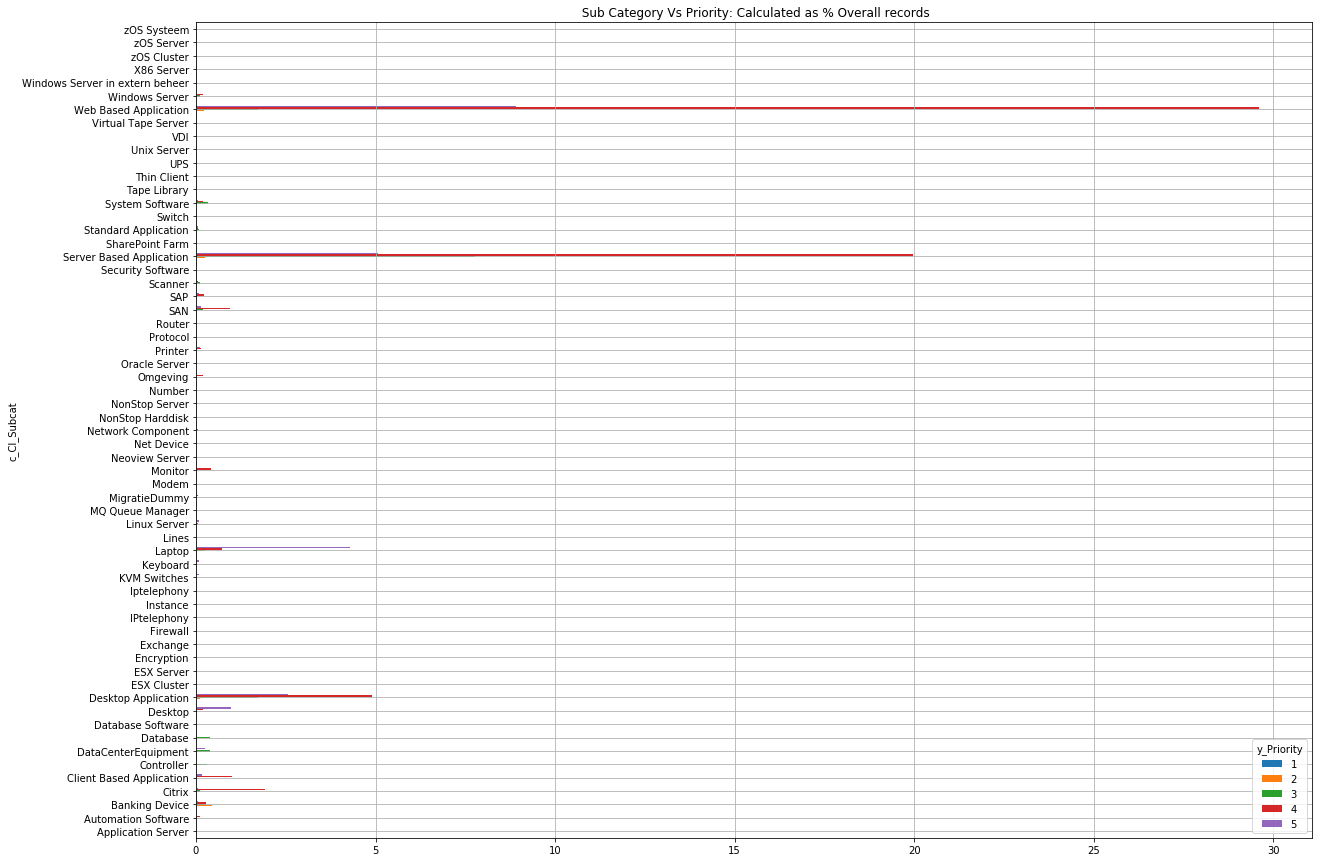

In [46]:
# No Additonal info
rcParams['figure.figsize'] =20,15
Crosstab_Cat = pd.crosstab([df1.c_CI_Subcat], df1.y_Priority,normalize = 'all').round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title=" Sub Category Vs Priority: Calculated as % Overall records")

## Analyse Closure Code

y_Priority                          1        2        3        4        5
c_Closure_Code                                                           
Data                           0.0000   6.0325   4.4396   4.8404   1.7666
Hardware                      33.3333  25.7541  12.6677   2.2885  18.7958
No error - works as designed   0.0000   1.8561   5.1697   6.9745   7.5231
Operator error                 0.0000   3.7123   2.9597   4.6270   2.2233
Other                         33.3333  32.9466  25.4144  32.2799  26.6314
Referred                       0.0000   0.6961   0.4341   0.3406   0.3245
Software                      33.3333  25.5220  24.4870  36.6253  31.7029
Unknown                        0.0000   1.6241   4.2818   3.3102   4.4586
User error                     0.0000   1.8561  18.5478   7.2924   3.5933
User manual not used           0.0000   0.0000   1.5983   1.4212   2.9804


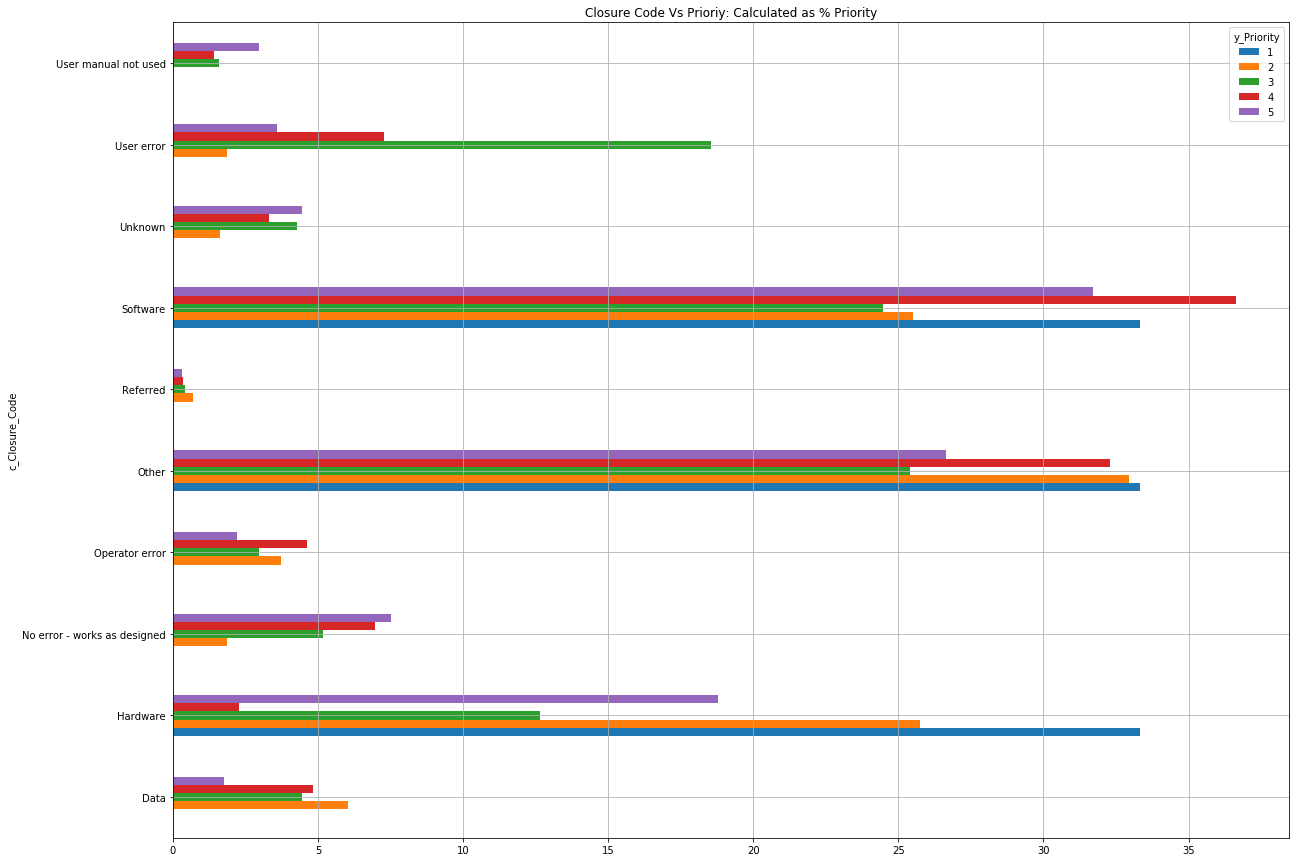

In [47]:
# Predominant reason for closure across P1-P5 is Hardware,Other,software
Crosstab_CC =  pd.crosstab(df1.c_Closure_Code, df1.y_Priority,  normalize = 'columns').round(6)*100
print(Crosstab_CC)
Crosstab_CC.plot(kind='barh', stacked=False, grid=True,title="Closure Code Vs Prioriy: Calculated as % Priority")

## Analyse WBSe: This could be interpreted as a cost centre related to dept

In [48]:
# Too many WBSe to get any meaningful insights 
# Churn Rate more than 2% and special care in states of with more than 3%
rcParams['figure.figsize'] =20,10
Crosstab_WBS =  pd.crosstab(df1.c_WBS, df1.y_Priority,  normalize = 'columns').round(6)*100
print(Crosstab_WBS)
#Crosstab_WBS.plot(kind='line', stacked=False, grid=True,title="WBSe Vs Prioriy: Calculated as % Priority")

y_Priority    1       2       3       4       5
c_WBS                                          
WBS000002   0.0  0.0000  0.1184  0.3678  0.5288
WBS000005   0.0  0.0000  0.0395  0.0908  0.0000
WBS000006   0.0  0.6961  0.2762  0.1044  0.0481
WBS000007   0.0  0.0000  0.1973  0.1498  0.0000
WBS000008   0.0  0.0000  0.0395  0.0363  0.0120
WBS000010   0.0  0.0000  0.0395  0.0000  0.0000
WBS000011   0.0  0.0000  0.0395  0.0000  0.0000
WBS000012   0.0  0.0000  0.0592  0.0636  0.1682
WBS000013   0.0  0.0000  3.5714  0.0136  0.0120
WBS000014   0.0  0.0000  2.3283  0.1635  0.1803
WBS000015   0.0  0.6961  0.1579  0.6085  0.7090
WBS000016   0.0  0.0000  7.3796  0.0272  0.0361
WBS000017   0.0  0.2320  0.3354  0.4632  0.1923
WBS000018   0.0  0.0000  0.0789  0.0227  0.0000
WBS000019   0.0  0.0000  0.0000  0.0045  0.0000
WBS000020   0.0  0.0000  0.0395  0.0000  0.0000
WBS000022   0.0  0.2320  0.0000  0.0227  0.0000
WBS000023   0.0  0.0000  4.2028  0.1317  0.0601
WBS000025   0.0  0.2320  0.0395  0.0272 

## Analyse No. of Ressignments ( Hand offs)

y_Priority                   1        2        3        4        5
q_No_of_Reassignments                                             
0                      66.6667  52.9002  64.3252  62.0306  55.3659
1                      33.3333  34.3387  17.5612  16.3965  15.0463
2                       0.0000   6.4965   8.2676   8.6364  12.2221
3                       0.0000   2.5522   3.2557   4.6815   5.9128
4                       0.0000   1.3921   2.5059   2.6836   4.1822
5                       0.0000   0.6961   1.1050   1.7527   1.7907
6                       0.0000   0.4640   0.9471   1.0489   1.7426
7                       0.0000   0.0000   0.5328   0.7674   0.9975
8                       0.0000   0.2320   0.3946   0.4586   0.7090
9                       0.0000   0.4640   0.2170   0.4041   0.3605
10                      0.0000   0.4640   0.2170   0.2634   0.3365
11                      0.0000   0.0000   0.1579   0.2089   0.2884
12                      0.0000   0.0000   0.1184   0.0999   0.

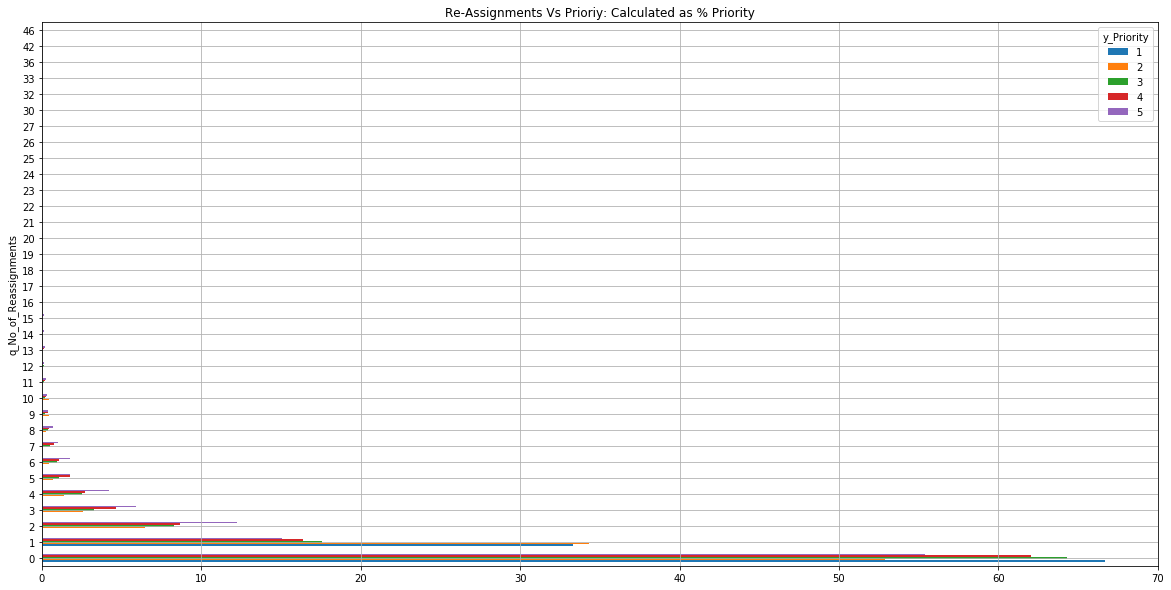

In [49]:
# P1 and P2 had very less Reassignments as compared to P3-P5. Its obvious due result due to SLA misses.
# No. Of Hands offs in P2 is relatively Higher.
# SLA look Too lenient from P3-P5
rcParams['figure.figsize'] =20,10
Crosstab_NR =  pd.crosstab(df1.q_No_of_Reassignments, df1.y_Priority,  normalize = 'columns').round(6)*100
print(Crosstab_NR)
Crosstab_NR.plot(kind='barh', stacked=False, grid=True,title="Re-Assignments Vs Prioriy: Calculated as % Priority")

## Analyse No. Of related Incidents

y_Priority                 1    2     3      4     5
q_No_of_Related_Incidents                           
0.0                        0  345  4836  21509  8079
1.0                        1   54   198    454   220
2.0                        0    8    13     38     8
3.0                        0    5     7      6     1
4.0                        0    2     4      2     3
5.0                        0    1     1      4     1
6.0                        0    1     1      3     3
7.0                        0    0     2      1     0
8.0                        0    1     3      1     0
9.0                        0    3     0      1     2
10.0                       0    0     0      0     1
11.0                       0    1     1      0     1
12.0                       0    2     0      2     0
13.0                       0    0     1      0     0
14.0                       0    0     0      1     0
15.0                       0    1     0      0     0
16.0                       0    1     0      1

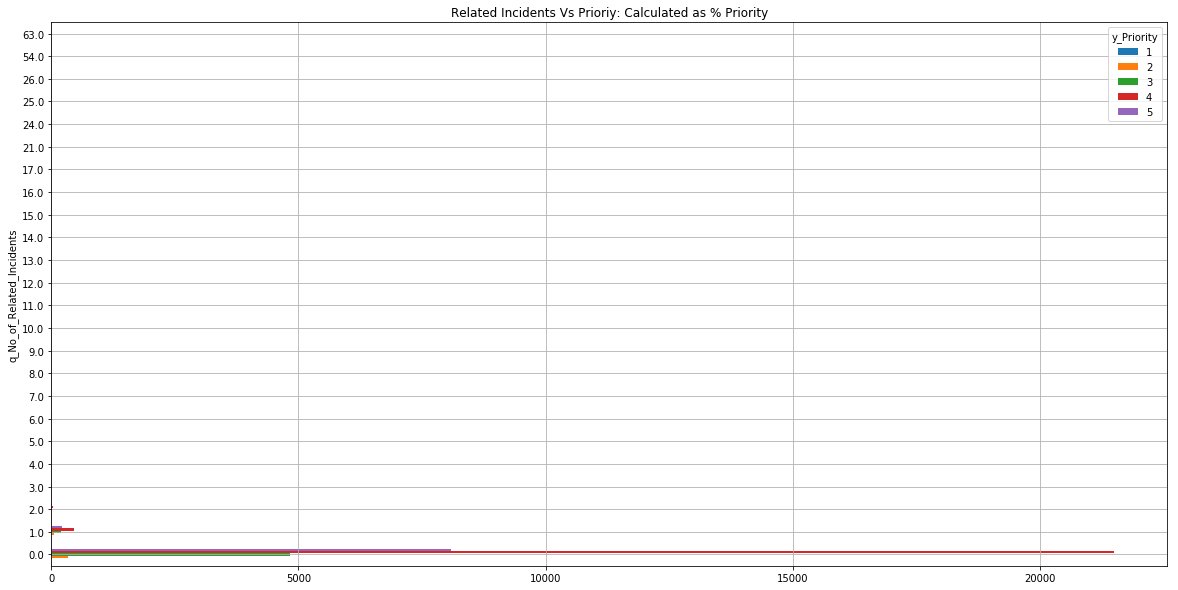

In [50]:
# Alomost All P1/P2 have related incidents in past
rcParams['figure.figsize'] =20,10
Crosstab_NR =  pd.crosstab(df1.q_No_of_Related_Incidents, df1.y_Priority)
#.round(6)*100
print(Crosstab_NR)
Crosstab_NR.plot(kind='barh', stacked=False, grid=True,title="Related Incidents Vs Prioriy: Calculated as % Priority")

# Analyse No. of related interactions ( No. of inerations wth clients)

y_Priority                          1        2        3        4        5
q_No_of_Related_Interactions                                             
0.0                            0.0000   0.0000   0.0789   0.1816   0.8172
1.0                           66.6667  84.2227  92.8177  92.8121  91.6957
2.0                           33.3333   5.8005   5.3275   5.6123   6.2252
3.0                            0.0000   1.6241   0.8682   0.9218   0.7331
4.0                            0.0000   1.1601   0.3354   0.1862   0.3605
5.0                            0.0000   0.4640   0.0789   0.0954   0.0240
6.0                            0.0000   0.9281   0.1184   0.0227   0.0000
7.0                            0.0000   0.6961   0.0592   0.0227   0.0120
8.0                            0.0000   0.4640   0.0197   0.0091   0.0120
9.0                            0.0000   0.2320   0.0197   0.0091   0.0120
10.0                           0.0000   0.2320   0.0395   0.0000   0.0000
11.0                           0.0000 

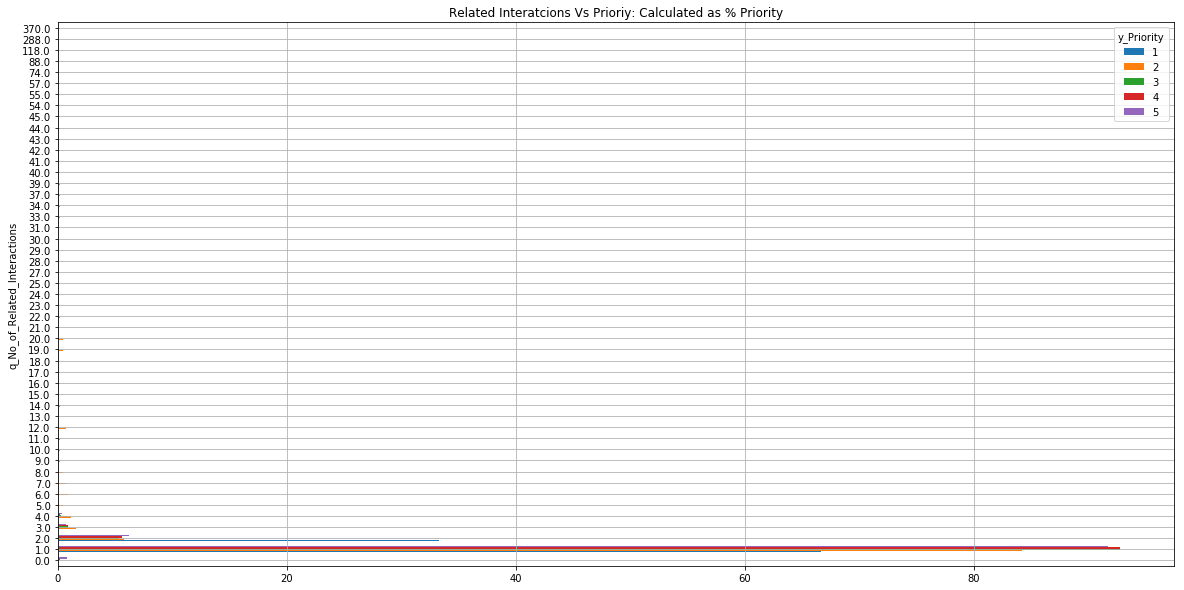

In [51]:
# No. of interatciosn are less in P1 and its increases as priority increases
rcParams['figure.figsize'] =20,10
Crosstab_NR =  pd.crosstab(df1.q_No_of_Related_Interactions, df1.y_Priority, normalize='columns').round(6)*100
print(Crosstab_NR)
Crosstab_NR.plot(kind='barh', stacked=False, grid=True,title="Related Interatcions Vs Prioriy: Calculated as % Priority")

## Analyse Ticket Reopen flag 

y_Priority        1        2        3        4        5
t_ReopenFlag                                           
0.0             0.0  97.2158  96.3694  95.5819  95.5174
1.0           100.0   2.7842   3.6306   4.4181   4.4826


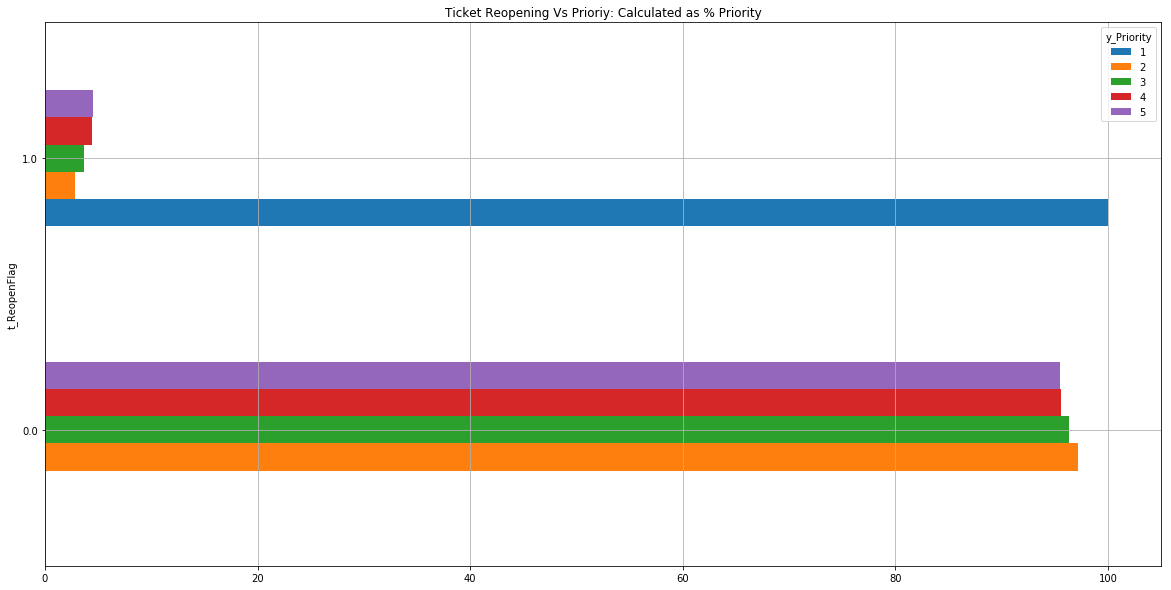

In [52]:
# All P1 tickets were reopend,
rcParams['figure.figsize'] =20,10
Crosstab_NR =  pd.crosstab(df1.t_ReopenFlag, df1.y_Priority,normalize='columns').round(6)*100
print(Crosstab_NR)
Crosstab_NR.plot(kind='barh', stacked=False, grid=True,title="Ticket Reopening Vs Prioriy: Calculated as % Priority")

In [54]:
# Masked after saving
#df1.to_csv("2_ITSM_cleansed_EDA.csv",index=False)

In [55]:
df1.columns

Index(['c_CI_Cat', 'c_CI_Name', 'c_CI_Subcat', 'c_Closure_Code', 'c_WBS',
       'q_No_of_Reassignments', 'q_No_of_Related_Incidents',
       'q_No_of_Related_Interactions', 't_Close_Time', 't_Open_Time',
       'y_Priority', 't_ReopenFlag', 't_TicketWIPDurationDays',
       't_TicketWIPDurationDays_bins'],
      dtype='object')

In [56]:
df1.head()

,c_CI_Cat,c_CI_Name,c_CI_Subcat,c_Closure_Code,c_WBS,q_No_of_Reassignments,q_No_of_Related_Incidents,q_No_of_Related_Interactions,t_Close_Time,t_Open_Time,y_Priority,t_ReopenFlag,t_TicketWIPDurationDays,t_TicketWIPDurationDays_bins
0,subapplication,SUB000508,Web Based Application,Other,WBS000162,26,2.0,1.0,2013-11-04 13:51:00,2012-02-05 13:32:00,4,0.0,638.013194,"(635.0, 640.0]"
1,application,WBA000124,Web Based Application,Software,WBS000088,33,1.0,1.0,2013-12-02 12:36:00,2012-03-12 15:44:00,3,1.0,629.869444,"(625.0, 630.0]"
2,application,WBA000124,Web Based Application,Operator error,WBS000088,13,0.0,1.0,2013-11-14 09:31:00,2012-07-17 11:49:00,4,0.0,484.904167,"(480.0, 485.0]"
3,application,WBA000124,Web Based Application,Other,WBS000088,2,0.0,1.0,2013-11-08 13:55:00,2012-08-10 11:01:00,4,0.0,455.120833,"(455.0, 460.0]"
4,application,WBA000124,Web Based Application,Other,WBS000088,4,0.0,1.0,2013-11-08 13:54:00,2012-08-10 11:27:00,4,0.0,455.102083,"(455.0, 460.0]"
